In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import cv2
##Para conectar con el drive
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage import io,filters
drive.mount('/content/drive')
##Direción de la imagen
PATH = '/content/drive/Shareddrives/Los mejorcitos/BD 810/BD 810/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Gray')

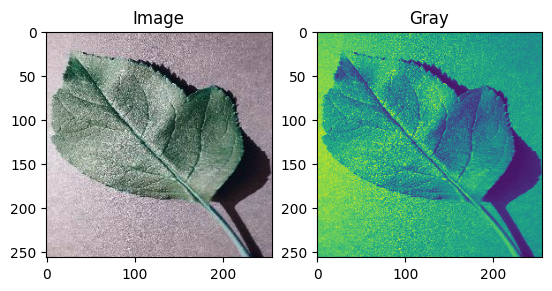

In [7]:
##281

image = cv2.imread(PATH + "Copia de "+str(1) + ".jpg", cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.subplot(121)
plt.imshow(image)
plt.title('Image')

plt.subplot(122)
plt.imshow(img_gray)
plt.title('Gray')

A la de Dios

In [21]:
import cv2
import numpy as np

def perform_3d_box_filtering(image):
    filtered_channels = []
    kernel_size = (3, 3)
    for channel in cv2.split(image):
        filtered_channel = cv2.boxFilter(channel, -1, kernel_size)
        filtered_channels.append(filtered_channel)
    filtered_image = cv2.merge(filtered_channels)
    return filtered_image

def decorrelation(image):
    image_float32 = image.astype(np.float32) / 255.0
    decorrelated_image = cv2.cvtColor(image_float32, cv2.COLOR_BGR2Lab)
    decorrelated_image[:, :, 1] = 0
    decorrelated_image[:, :, 2] = 0
    decorrelated_image = cv2.cvtColor(decorrelated_image, cv2.COLOR_Lab2BGR)
    decorrelated_image = (decorrelated_image * 255).astype(np.uint8)
    return decorrelated_image

def apply_3d_gaussian_filter(image):
    sigma = (1, 1)
    filtered_image = cv2.GaussianBlur(image, sigma, 0)
    return filtered_image

def apply_3d_median_filter(image):
    kernel_size = 3
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def disease_spot_enhancement(image):
    # Perform 3D Box Filtering
    box_filtered_image = perform_3d_box_filtering(image)

    # Perform DeCorrelation
    decorrelated_image = decorrelation(box_filtered_image)

    # Apply 3D Gaussian Filter
    gaussian_filtered_image = apply_3d_gaussian_filter(decorrelated_image)

    # Apply 3D Median Filter
    median_filtered_image = apply_3d_median_filter(gaussian_filtered_image)

    return median_filtered_image

def disease_spot_detection(image):
    # Convert to HSI color space
    hsi_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Select the S channel
    s_channel = hsi_image[:, :, 1]

    # Define pixels based on clusters
    _, binary_image = cv2.threshold(s_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Select higher value pixels
    higher_value_pixels = cv2.bitwise_and(image, image, mask=binary_image)

    # Calculate distance between selected pixels
    distance_map = cv2.distanceTransform(binary_image, cv2.DIST_L2, 3)

    # Strong correlation-based pixels selection
    strong_correlation_mask = distance_map > np.max(distance_map) * 0.1
    strong_correlation_pixels = cv2.bitwise_and(higher_value_pixels, higher_value_pixels, mask=strong_correlation_mask.astype(np.uint8))

    # Set threshold function
    threshold_value = np.mean(strong_correlation_pixels) + np.std(strong_correlation_pixels)
    _, segmented_image = cv2.threshold(strong_correlation_pixels, threshold_value, 255, cv2.THRESH_BINARY)

    return segmented_image

def entropy_based_fusion(image1, image2):
    # Convert images to grayscale
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculate entropy for each image
    hist1, _ = np.histogram(gray_image1.ravel(), bins=256, range=[0, 256])
    hist2, _ = np.histogram(gray_image2.ravel(), bins=256, range=[0, 256])
    entropy1 = -np.sum((hist1 / np.sum(hist1)) * np.log2(hist1 / np.sum(hist1)))
    entropy2 = -np.sum((hist2 / np.sum(hist2)) * np.log2(hist2 / np.sum(hist2)))
    entropy1 /= np.sum(entropy1)
    entropy2 /= np.sum(entropy2)
    entropy1 = np.maximum(1e-7, entropy1)  # Avoid division by zero
    entropy2 = np.maximum(1e-7, entropy2)  # Avoid division by zero

    # Calculate weights for entropy-based fusion
    weight1 = entropy1 / (entropy1 + entropy2)
    weight2 = entropy2 / (entropy1 + entropy2)

    # Perform entropy-based fusion
    fused_image = cv2.addWeighted(image1, weight1, image2, weight2, 0)

    # Convert to binary image
    _, binary_image = cv2.threshold(fused_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary_image

# Load the image
image_path = '/content/drive/Shareddrives/Los mejorcitos/BD 810/BD 810/Copia de 1.jpg'


image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Disease Spot Enhancement
enhanced_image = disease_spot_enhancement(image)

# Disease Spot Detection
segmented_1 = disease_spot_detection(enhanced_image)

# Entropy-based Fusion
fused_image = entropy_based_fusion(segmented_1, segmented_2)

# Save the resulting images
cv2.imwrite('/content/drive/Shareddrives/Los mejorcitos/Segmented_1.jpg', segmented_1)
cv2.imwrite('/content/drive/Shareddrives/Los mejorcitos/Segmented_2.jpg', segmented_2)
cv2.imwrite('/content/drive/Shareddrives/Los mejorcitos/Disease.jpg', fused_image)

# Display the images
plt.subplot(131)
plt.imshow(segmented_1, cmap='gray')
plt.title('Segmented 1')
plt.subplot(132)
plt.imshow(segmented_2, cmap='gray')
plt.title('Segmented 2')
plt.subplot(133)
plt.imshow(fused_image, cmap='gray')
plt.title('Disease')
plt.tight_layout()
plt.show()

error: ignored

<ipython-input-30-aa5b38031306>:82: RuntimeWarning: divide by zero encountered in log2
  entropy1 = -np.sum((hist1 / np.sum(hist1)) * np.log2(hist1 / np.sum(hist1)))
<ipython-input-30-aa5b38031306>:82: RuntimeWarning: invalid value encountered in multiply
  entropy1 = -np.sum((hist1 / np.sum(hist1)) * np.log2(hist1 / np.sum(hist1)))
<ipython-input-30-aa5b38031306>:83: RuntimeWarning: divide by zero encountered in log2
  entropy2 = -np.sum((hist2 / np.sum(hist2)) * np.log2(hist2 / np.sum(hist2)))
<ipython-input-30-aa5b38031306>:83: RuntimeWarning: invalid value encountered in multiply
  entropy2 = -np.sum((hist2 / np.sum(hist2)) * np.log2(hist2 / np.sum(hist2)))


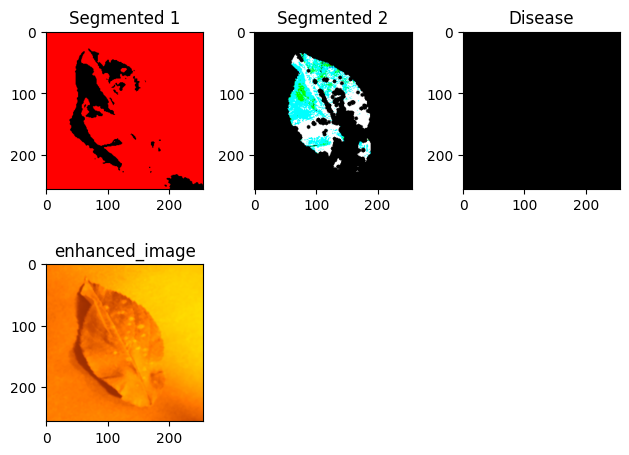

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def perform_3d_box_filtering(image):
    filtered_channels = []
    kernel_size = (3, 3)
    for channel in cv2.split(image):
        filtered_channel = cv2.boxFilter(channel, -1, kernel_size)
        filtered_channels.append(filtered_channel)
    filtered_image = cv2.merge(filtered_channels)
    return filtered_image

def decorrelation(image):
    image_float32 = image.astype(np.float32) / 255.0
    decorrelated_image = cv2.cvtColor(image_float32, cv2.COLOR_BGR2Lab)
    decorrelated_image[:, :, 1] = -50
    decorrelated_image[:, :, 2] = -100
    decorrelated_image = cv2.cvtColor(decorrelated_image, cv2.COLOR_Lab2BGR)
    decorrelated_image = (decorrelated_image * 255).astype(np.uint8)
    return decorrelated_image

def apply_3d_gaussian_filter(image):
    sigma = (1, 1)
    filtered_image = cv2.GaussianBlur(image, sigma, 0)
    return filtered_image

def apply_3d_median_filter(image):
    kernel_size = 3
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def disease_spot_enhancement(image):
    # Perform 3D Box Filtering
    box_filtered_image = perform_3d_box_filtering(image)

    # Perform DeCorrelation
    decorrelated_image = decorrelation(box_filtered_image)

    # Apply 3D Gaussian Filter
    gaussian_filtered_image = apply_3d_gaussian_filter(decorrelated_image)

    # Apply 3D Median Filter
    median_filtered_image = apply_3d_median_filter(gaussian_filtered_image)

    return median_filtered_image

def disease_spot_detection(image):
    # Convert to HSI color space
    hsi_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Select the S channel
    s_channel = hsi_image[:, :, 1]

    # Define pixels based on clusters
    _, binary_image = cv2.threshold(s_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Select higher value pixels
    higher_value_pixels = cv2.bitwise_and(image, image, mask=binary_image)

    # Calculate distance between selected pixels
    distance_map = cv2.distanceTransform(binary_image, cv2.DIST_L2, 3)

    # Strong correlation-based pixels selection
    strong_correlation_mask = distance_map > np.max(distance_map) * 0.1
    strong_correlation_pixels = cv2.bitwise_and(higher_value_pixels, higher_value_pixels, mask=strong_correlation_mask.astype(np.uint8))

    # Set threshold function
    threshold_value = np.mean(strong_correlation_pixels) + np.std(strong_correlation_pixels)
    _, segmented_image = cv2.threshold(strong_correlation_pixels, threshold_value, 255, cv2.THRESH_BINARY)

    return segmented_image

def entropy_based_fusion(image1, image2):
    # Convert images to grayscale
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculate entropy for each image
    hist1, _ = np.histogram(gray_image1.ravel(), bins=256, range=[0, 256])
    hist2, _ = np.histogram(gray_image2.ravel(), bins=256, range=[0, 256])
    entropy1 = -np.sum((hist1 / np.sum(hist1)) * np.log2(hist1 / np.sum(hist1)))
    entropy2 = -np.sum((hist2 / np.sum(hist2)) * np.log2(hist2 / np.sum(hist2)))
    entropy1 /= np.sum(entropy1)
    entropy2 /= np.sum(entropy2)
    entropy1 = np.maximum(1e-7, entropy1)  # Avoid division by zero
    entropy2 = np.maximum(1e-7, entropy2)  # Avoid division by zero

    # Calculate weights for entropy-based fusion
    weight1 = entropy1 / (entropy1 + entropy2)
    weight2 = entropy2 / (entropy1 + entropy2)

    # Perform entropy-based fusion
    fused_image = cv2.addWeighted(image1, weight1, image2, weight2, 0)

    # Convert to grayscale
    fused_image_gray = cv2.cvtColor(fused_image, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's threshold
    _, binary_image = cv2.threshold(fused_image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary_image

# Load the image
image_path = '/content/drive/Shareddrives/Los mejorcitos/BD 810/BD 810/Copia de 274.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Disease Spot Enhancement
enhanced_image = disease_spot_enhancement(image)

# Disease Spot Detection
segmented_1 = disease_spot_detection(enhanced_image)
segmented_2 = disease_spot_detection(image)

# Entropy-based Fusion
fused_image = entropy_based_fusion(segmented_1, segmented_2)

# Display the images
plt.subplot(231)
plt.imshow(segmented_1, cmap='gray')
plt.title('Segmented 1')
plt.subplot(232)
plt.imshow(segmented_2, cmap='gray')
plt.title('Segmented 2')
plt.subplot(233)
plt.imshow(fused_image, cmap='gray')
plt.title('Disease')
plt.tight_layout()
plt.subplot(234)
plt.imshow(enhanced_image)
plt.title('enhanced_image')
plt.tight_layout()



plt.show()

In [ ]:



    
def perform_3d_box_filtering(image):
    filtered_channels = []
    kernel_size = (3, 3)
    for channel in cv2.split(image):
        filtered_channel = cv2.boxFilter(channel, -1, kernel_size)
        filtered_channels.append(filtered_channel)
    filtered_image = cv2.merge(filtered_channels)
    return filtered_image

def decorrelation(image):
    image_float32 = image.astype(np.float32) / 255.0
    decorrelated_image = cv2.cvtColor(image_float32, cv2.COLOR_BGR2Lab)
    decorrelated_image[:, :, 1] = 0
    decorrelated_image[:, :, 2] = 0
    decorrelated_image = cv2.cvtColor(decorrelated_image, cv2.COLOR_Lab2BGR)
    decorrelated_image = (decorrelated_image * 255).astype(np.uint8)
    return decorrelated_image

def apply_3d_gaussian_filter(image):
    sigma = (1, 1)
    filtered_image = cv2.GaussianBlur(image, sigma, 0)
    return filtered_image

def apply_3d_median_filter(image):
    kernel_size = 3
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image

def disease_spot_enhancement(image):
    # Perform 3D Box Filtering
    box_filtered_image = perform_3d_box_filtering(image)

    # Perform DeCorrelation
    decorrelated_image = decorrelation(box_filtered_image)

    # Apply 3D Gaussian Filter
    gaussian_filtered_image = apply_3d_gaussian_filter(decorrelated_image)

    # Apply 3D Median Filter
    median_filtered_image = apply_3d_median_filter(gaussian_filtered_image)

    return median_filtered_image

Propuesta Charlito

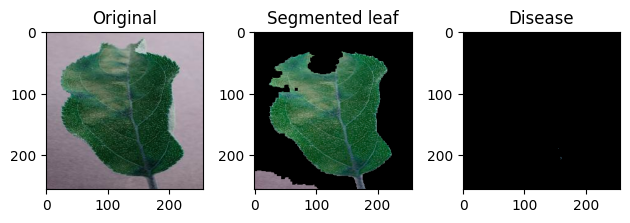

In [37]:
import cv2
import numpy as np

def enhance_brightness(image):
    # Convertir la imagen a espacio de color HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Aumentar la componente de brillo (V)
    hsv_image[:,:,2] = cv2.add(hsv_image[:,:,2], 30)
    
    # Convertir la imagen de nuevo a espacio de color BGR
    enhanced_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    
    return enhanced_image

def segment_leaf(image):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar umbral adaptativo para segmentar la hoja del fondo
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Eliminar pequeños contornos
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < 1000:
            cv2.drawContours(binary_image, [contour], 0, 0, -1)
    
    # Aplicar operación morfológica de cierre para unir regiones
    kernel = np.ones((5, 5), np.uint8)
    closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    
    # Obtener la zona de la hoja mediante la segmentación
    segmented_leaf = cv2.bitwise_and(image, image, mask=closed_image)
    
    return segmented_leaf

def segment_diseased_area(image):
    # Convertir la imagen a espacio de color HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Definir rangos de color para la detección de enfermedades (sarna y roya)
    lower_color_range = np.array([0, 100, 100], dtype=np.uint8)
    upper_color_range = np.array([20, 255, 255], dtype=np.uint8)
    
    # Aplicar umbral en el rango de color para segmentar la zona enferma
    mask = cv2.inRange(hsv_image, lower_color_range, upper_color_range)
    
    # Obtener la zona enferma de la hoja
    diseased_area = cv2.bitwise_and(image, image, mask=mask)
    
    return diseased_area

# Cargar la imagen
image_path = '/content/drive/Shareddrives/Los mejorcitos/BD 810/BD 810/Copia de 700.jpg'
image = cv2.imread(image_path)

# Mejorar la iluminación y el brillo de la imagen
enhanced_image = enhance_brightness(image)

# Segmentar la hoja del fondo
segmented_leaf = segment_leaf(enhanced_image)

# Segmentar la zona enferma de la hoja
diseased_area = segment_diseased_area(segmented_leaf)

# Display the images
plt.subplot(131)
plt.imshow(image)
plt.title('Original')
plt.subplot(132)
plt.imshow(segmented_leaf)
plt.title('Segmented leaf')
plt.subplot(133)
plt.imshow(diseased_area)
plt.title('Disease')
plt.tight_layout()
plt.show()
